In [556]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale


In [557]:
df = pd.read_csv('./heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [558]:
all_feature_cols  = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

X = df[all_feature_cols]
y = df['HeartDisease']



In [559]:
ohe = OneHotEncoder()
column_trans = make_column_transformer((OneHotEncoder(), ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']), remainder='passthrough')
X = column_trans.fit_transform(X)
print(X)
X = scale(X)

[[  0.    1.    0.  ...   0.  172.    0. ]
 [  1.    0.    0.  ...   0.  156.    1. ]
 [  0.    1.    0.  ...   0.   98.    0. ]
 ...
 [  0.    1.    1.  ...   0.  115.    1.2]
 [  1.    0.    0.  ...   0.  174.    0. ]
 [  0.    1.    0.  ...   0.  173.    0. ]]


In [560]:
X

array([[-0.51595242,  0.51595242, -1.08413811, ..., -0.55134134,
         1.38292822, -0.83243239],
       [ 1.93816322, -1.93816322, -1.08413811, ..., -0.55134134,
         0.75415714,  0.10566353],
       [-0.51595242,  0.51595242, -1.08413811, ..., -0.55134134,
        -1.52513802, -0.83243239],
       ...,
       [-0.51595242,  0.51595242,  0.9223917 , ..., -0.55134134,
        -0.85706875,  0.29328271],
       [ 1.93816322, -1.93816322, -1.08413811, ..., -0.55134134,
         1.4615246 , -0.83243239],
       [-0.51595242,  0.51595242, -1.08413811, ..., -0.55134134,
         1.42222641, -0.83243239]])

In [561]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

my_logreg = LogisticRegression(max_iter=2000)
my_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [562]:
y_predict_lr = my_logreg.predict(X_test)
y_predict_prob_log_r = my_logreg.predict_proba(X_test)
score_logreg = accuracy_score(y_test, y_predict_lr)

In [563]:
print(score_logreg)

0.8869565217391304


In [564]:
print(y_predict_prob_log_r)

[[0.42973851 0.57026149]
 [0.06095133 0.93904867]
 [0.80747084 0.19252916]
 [0.76425668 0.23574332]
 [0.90554189 0.09445811]
 [0.0472208  0.9527792 ]
 [0.02474503 0.97525497]
 [0.14266031 0.85733969]
 [0.90420833 0.09579167]
 [0.91956413 0.08043587]
 [0.97768645 0.02231355]
 [0.39165988 0.60834012]
 [0.96143405 0.03856595]
 [0.93944681 0.06055319]
 [0.77719346 0.22280654]
 [0.04741034 0.95258966]
 [0.9813811  0.0186189 ]
 [0.90268277 0.09731723]
 [0.96665012 0.03334988]
 [0.16287706 0.83712294]
 [0.09349436 0.90650564]
 [0.36899063 0.63100937]
 [0.94223835 0.05776165]
 [0.8653794  0.1346206 ]
 [0.0083404  0.9916596 ]
 [0.08573248 0.91426752]
 [0.98955061 0.01044939]
 [0.33050717 0.66949283]
 [0.06694571 0.93305429]
 [0.47246048 0.52753952]
 [0.01789778 0.98210222]
 [0.48263463 0.51736537]
 [0.07124763 0.92875237]
 [0.05956127 0.94043873]
 [0.14382952 0.85617048]
 [0.9587881  0.0412119 ]
 [0.02230183 0.97769817]
 [0.04746383 0.95253617]
 [0.00997646 0.99002354]
 [0.19894363 0.80105637]


In [565]:
print(y_predict_prob_log_r[:,1])

[0.57026149 0.93904867 0.19252916 0.23574332 0.09445811 0.9527792
 0.97525497 0.85733969 0.09579167 0.08043587 0.02231355 0.60834012
 0.03856595 0.06055319 0.22280654 0.95258966 0.0186189  0.09731723
 0.03334988 0.83712294 0.90650564 0.63100937 0.05776165 0.1346206
 0.9916596  0.91426752 0.01044939 0.66949283 0.93305429 0.52753952
 0.98210222 0.51736537 0.92875237 0.94043873 0.85617048 0.0412119
 0.97769817 0.95253617 0.99002354 0.80105637 0.97826153 0.01807434
 0.65451378 0.85979436 0.76954399 0.94963975 0.90117897 0.93143199
 0.298329   0.50668271 0.93975903 0.27540526 0.03318398 0.01740698
 0.02452518 0.14274261 0.92697328 0.77373609 0.0211071  0.98345508
 0.78799725 0.00934546 0.03530711 0.86277779 0.91954477 0.98178255
 0.49904974 0.9800591  0.03304269 0.00926565 0.9506313  0.57927688
 0.07710646 0.13765667 0.26279436 0.46988701 0.29153278 0.24828096
 0.08035794 0.9564896  0.43042104 0.94130901 0.10310428 0.87903948
 0.97089261 0.59447503 0.06479921 0.01144388 0.10050291 0.9807503

In [566]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_log_r[:,1], pos_label=1)

In [567]:
print(fpr)

[0.         0.         0.         0.00952381 0.00952381 0.01904762
 0.01904762 0.02857143 0.02857143 0.03809524 0.03809524 0.04761905
 0.04761905 0.05714286 0.05714286 0.06666667 0.06666667 0.08571429
 0.08571429 0.0952381  0.0952381  0.1047619  0.1047619  0.11428571
 0.11428571 0.12380952 0.12380952 0.16190476 0.16190476 0.17142857
 0.17142857 0.18095238 0.18095238 0.2        0.2        0.26666667
 0.26666667 0.27619048 0.27619048 0.40952381 0.40952381 0.41904762
 0.41904762 0.67619048 0.67619048 0.68571429 0.68571429 1.        ]


In [568]:
print(tpr)

[0.    0.008 0.36  0.36  0.376 0.376 0.584 0.584 0.592 0.592 0.624 0.624
 0.704 0.704 0.736 0.736 0.792 0.792 0.808 0.808 0.824 0.824 0.832 0.832
 0.904 0.904 0.912 0.912 0.92  0.92  0.936 0.936 0.944 0.944 0.952 0.952
 0.96  0.96  0.968 0.968 0.976 0.976 0.984 0.984 0.992 0.992 1.    1.   ]


In [569]:
AUC = metrics.auc(fpr, tpr)

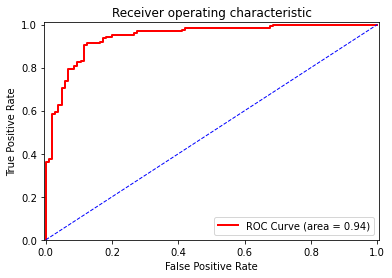

In [570]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)


# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [571]:


# print(doubleFeatureResults)
print(X[0: 2])


[[-0.51595242  0.51595242 -1.08413811  2.07517671 -0.53283777 -0.22967867
  -0.50747832  0.81427482 -0.49044933  0.8235563  -0.8235563  -0.27144836
  -1.00218103  1.15067399 -1.4331398   0.41090889  0.82507026 -0.55134134
   1.38292822 -0.83243239]
 [ 1.93816322 -1.93816322 -1.08413811 -0.48188667  1.87674385 -0.22967867
  -0.50747832  0.81427482 -0.49044933  0.8235563  -0.8235563  -0.27144836
   0.99782372 -0.86905588 -0.47848359  1.49175234 -0.17196105 -0.55134134
   0.75415714  0.10566353]]


# Cross-Validation

In [573]:
cross = cross_val_score(my_logreg, X, y, cv=10,  scoring='neg_mean_squared_error')



In [574]:
cross_list_positive = -cross
rmse_list = np.sqrt(cross_list_positive)
print(rmse_list)

[0.41702883 0.27583864 0.37590471 0.2331262  0.36115756 0.39009475
 0.34578204 0.41702883 0.52414242 0.45693677]


In [575]:
print(rmse_list.mean())

0.37970407368068826


In [576]:
0.37970407368068826

0.37970407368068826